<a href="https://colab.research.google.com/github/jgkorman/Statistical-Analysis-In-Python/blob/main/Parametric_Models_for_continuous_time_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fname = "/content/drive/MyDrive/Delaware/Summer 2023/ICPSR/MLE 2/Lecture 7 Parametric Models for continous time/whas500.csv"
data = pd.read_csv(fname)

data

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,...,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
0,1,83,0,89,152,78,25.54051,1,1,0,...,1,0,1,01/13/1997,01/18/1997,12/31/2002,5,0,2178,0
1,2,49,0,84,120,60,24.02398,1,0,0,...,0,1,1,01/19/1997,01/24/1997,12/31/2002,5,0,2172,0
2,3,70,1,83,147,88,22.14290,0,0,0,...,0,1,1,1/01/1997,1/06/1997,12/31/2002,5,0,2190,0
3,4,70,0,65,123,76,26.63187,1,0,0,...,0,1,1,02/17/1997,02/27/1997,12/11/1997,10,0,297,1
4,5,70,0,63,135,85,24.41255,1,0,0,...,0,1,1,3/01/1997,3/07/1997,12/31/2002,6,0,2131,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,76,1,68,112,88,27.96454,1,1,0,...,0,1,3,7/09/2001,7/10/2001,07/19/2001,1,0,10,1
496,497,76,1,88,208,96,24.26862,1,0,0,...,0,0,3,3/09/2001,3/12/2001,12/31/2002,3,0,662,0
497,498,57,1,123,120,74,42.13576,1,1,0,...,0,0,3,1/05/2001,1/08/2001,12/31/2002,3,0,725,0
498,499,67,0,59,112,62,27.40905,1,0,0,...,0,1,3,07/17/2001,07/18/2001,12/31/2002,1,0,532,0


#**Estimate Parametric Models**

In [ ]:
!pip install lifelines

In [ ]:

# generalized gamma distribution
import pandas as pd


from lifelines import CoxPHFitter

# Load your DataFrame (assuming the data is in 'whas500')
# Replace 'your_data.csv' with the actual filename/path if reading from a CSV
# data = pd.read_csv('your_data.csv')

# Convert 'gender' to an ordinal variable using pandas Categorical
data['gender'] = pd.Categorical(data['gender']).codes

# Fit the flexible parametric survival regression model (gengamma distribution)
cph = CoxPHFitter()
cph.fit(data, duration_col='lenfol', event_col='fstat', formula='gender')

# Print the model summary
print(cph.summary)



               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
gender     0.381512   1.464497  0.137584        0.111853        0.651171   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to         z  \
covariate                                                               
gender                1.118349             1.917785     0.0  2.772946   

                  p  -log2(p)  
covariate                      
gender     0.005555  7.491965  


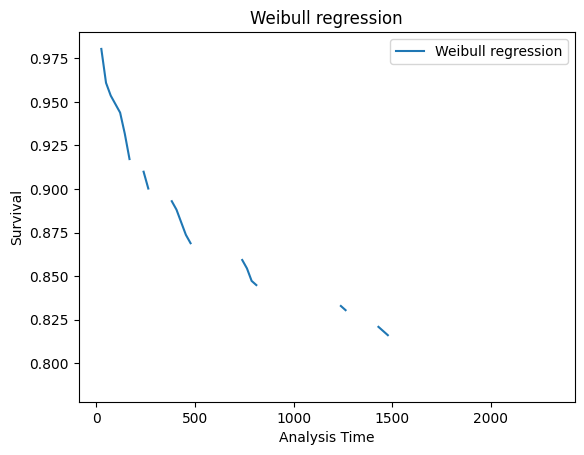

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame to store the predicted survival probabilities
time_points = np.linspace(data['lenfol'].min(), data['lenfol'].max(), num=100)
surv_pred = pd.DataFrame(time_points, columns=['time'])

# Calculate the survival probabilities using the fitted model
surv_pred['survProb'] = cph.predict_survival_function(surv_pred['time']).mean(1)

# Plot the survival curve
plt.plot(surv_pred['time'], surv_pred['survProb'], label='Weibull regression')
plt.xlabel('Analysis Time')
plt.ylabel('Survival')
plt.title('Weibull regression')
plt.legend()
plt.show()


In [ ]:
# weibull distribution proportional hazards

import pandas as pd
from lifelines import WeibullAFTFitter

# Load your DataFrame (assuming the data is in 'whas500')
# Replace 'your_data.csv' with the actual filename/path if reading from a CSV
# data = pd.read_csv('your_data.csv')

# Convert 'gender' to an ordinal variable using pandas Categorical
data['gender'] = pd.Categorical(data['gender']).codes

# Fit the Weibull proportional hazards model (WeibullAFTFitter)
aft = WeibullAFTFitter()
aft.fit(data, duration_col='lenfol', event_col='fstat', formula='gender')

# Print the model summary
print(aft.summary)


                       coef    exp(coef)  se(coef)  coef lower 95%  \
param   covariate                                                    
lambda_ Intercept  8.698612  5994.587884  0.232428        8.243061   
        gender    -0.881249     0.414265  0.296114       -1.461622   
rho_    Intercept -0.760544     0.467412  0.062227       -0.882507   

                   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
param   covariate                                                             
lambda_ Intercept        9.154163          3801.159251          9453.717018   
        gender          -0.300875             0.231860             0.740170   
rho_    Intercept       -0.638581             0.413744             0.528041   

                   cmp to          z              p     -log2(p)  
param   covariate                                                 
lambda_ Intercept     0.0  37.424939  1.535965e-306  1015.890851  
        gender        0.0  -2.976042   2.919949e-03 

In [ ]:
# accelerated failure time

import pandas as pd
from lifelines import WeibullFitter

# Load your DataFrame (assuming the data is in 'whas500')
# Replace 'your_data.csv' with the actual filename/path if reading from a CSV
# data = pd.read_csv('your_data.csv')

# Convert 'gender' to an ordinal variable using pandas Categorical
data['gender'] = pd.Categorical(data['gender']).codes

# Fit the Weibull survival regression model (WeibullFitter)
weibull_model = WeibullFitter()
weibull_model.fit(data['lenfol'], data['fstat'])

# Print the model summary
print(weibull_model.summary)


                coef    se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  4114.352794  711.429602     2719.976396     5508.729191     1.0   
rho_        0.465801    0.029032        0.408900        0.522702     1.0   

                 z             p    -log2(p)  
lambda_   5.781813  7.389991e-09   27.011780  
rho_    -18.400649  1.298007e-75  248.768309  


In [ ]:
# with exponential distribution

import pandas as pd
from lifelines import ExponentialFitter

# Load your DataFrame (assuming the data is in 'whas500')
# Replace 'your_data.csv' with the actual filename/path if reading from a CSV
# data = pd.read_csv('your_data.csv')

# Convert 'gender' to ordinal (as_factor) using pandas Categorical
data['gender'] = pd.Categorical(data['gender']).codes

# Check and convert the 'lenfol' column to numeric (if needed)
data['lenfol'] = pd.to_numeric(data['lenfol'], errors='coerce')

# Remove rows with NaN values in the 'lenfol' column
data = data.dropna(subset=['lenfol'])

# Create the time and event data using lifelines Surv function
time_event = data.apply(lambda row: (row['lenfol'], row['fstat']), axis=1)

# Fit the Exponential survival regression model (ExponentialFitter)
exp_model = ExponentialFitter()
exp_model.fit(data['lenfol'], data['fstat'])

# Print the model summary
print(exp_model.summary)


               coef    se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  2052.17676  139.957294     1777.865503     2326.488016     0.0   

                 z             p    -log2(p)  
lambda_  14.662878  1.114468e-48  159.296193  


In [ ]:
# loglogistic
import pandas as pd
from lifelines import LogLogisticFitter

# Load your DataFrame (assuming the data is in 'whas500')
# Replace 'your_data.csv' with the actual filename/path if reading from a CSV
# data = pd.read_csv('your_data.csv')

# Convert 'gender' to ordinal (as_factor) using pandas Categorical
data['gender'] = pd.Categorical(data['gender']).codes

# Create the Log-Logistic survival regression model (LogLogisticFitter)
loglogistic_model = LogLogisticFitter()
loglogistic_model.fit(data['lenfol'], data['fstat'])

# Print the model summary
print(loglogistic_model.summary)


               coef    se(coef)  coef lower 95%  coef upper 95%  cmp to  \
alpha_  2059.756982  371.256944     1332.106743     2787.407221     1.0   
beta_      0.527717    0.031752        0.465485        0.589949     1.0   

                z             p    -log2(p)  
alpha_   5.545370  2.933338e-08   25.022881  
beta_  -14.874299  4.840305e-50  163.821307  


In [ ]:
# log normal distribution

import pandas as pd
from lifelines import LogNormalFitter

# Load your DataFrame (assuming the data is in 'whas500')
# Replace 'your_data.csv' with the actual filename/path if reading from a CSV
# data = pd.read_csv('your_data.csv')

# Convert 'gender' to ordinal (as_factor) using pandas Categorical
data['gender'] = pd.Categorical(data['gender']).codes

# Create the Log-Normal survival regression model (LogNormalFitter)
lognormal_model = LogNormalFitter()
lognormal_model.fit(data['lenfol'], data['fstat'])

# Print the model summary
print(lognormal_model.summary)


            coef  se(coef)  coef lower 95%  coef upper 95%  cmp to          z  \
mu_     7.705282  0.204467        7.304534         8.10603     0.0  37.684720   
sigma_  3.397905  0.182547        3.040119         3.75569     1.0  13.135824   

                    p     -log2(p)  
mu_     8.838756e-311  1029.975794  
sigma_   2.052459e-39   128.517842  


In [ ]:
# gompertz distribution
import pandas as pd
from lifelines import WeibullFitter

# Load your DataFrame (assuming the data is in 'whas500')
# Replace 'your_data.csv' with the actual filename/path if reading from a CSV
# data = pd.read_csv('your_data.csv')

# Convert 'gender' to ordinal (as_factor) using pandas Categorical
data['gender'] = pd.Categorical(data['gender']).codes

# Create the Gompertz (Weibull) survival regression model
gompertz_model = WeibullFitter()
gompertz_model.fit(data['lenfol'], data['fstat'])

# Print the model summary
print(gompertz_model.summary)


                coef    se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  4114.352794  711.429602     2719.976396     5508.729191     1.0   
rho_        0.465801    0.029032        0.408900        0.522702     1.0   

                 z             p    -log2(p)  
lambda_   5.781813  7.389991e-09   27.011780  
rho_    -18.400649  1.298007e-75  248.768309  
